# Grain Size Analysis using Python

In this case example we performs grain size distribution analysis and dumps results into a csv file.

Step 1: Read image and define pixel size (if needed to convert results into microns, not pixels)


Step 2: Denoising, if required and threshold image to separate grains from boundaries.


Step 3: Clean up image, if needed (erode, etc.) and create a mask for grains


Step 4: Label grains in the masked image


Step 5: Measure the properties of each grain (object)


Step 6: Output results into a csv file

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage
from skimage import measure, color, io

### Step 1 : Reading the Image

In [2]:
img1 = cv2.imread("images/grains2.jpg")
img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

In [3]:
pixels_to_um = 0.5 # 1 pixel = 500 nm (got this from the metadata of original image)

In [9]:
#cropped_img = img[0:450, :]   #Crop the scalebar region

### Step 2 : Thresholding

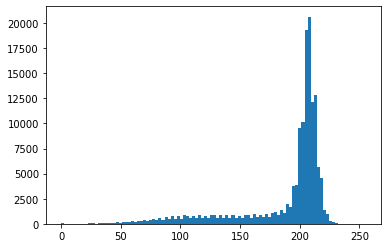

In [11]:
#Denoising, if required

#No need for any denoising or smoothing as the image looks good.
#Otherwise, try Median or NLM

plt.hist(img.flat, bins=100, range=(0,255))
plt.show()

In [4]:
#Threshold image to binary using OTSU. ALl thresholded pixels will be set to 255
ret1, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [13]:
print(ret1)  #Gives 157 on grains2.jpg. OTSU determined this to be the best threshold. 

157.0


OTSU picked threshold value for this image is 157. If you look at the threshold it's also a 8 bit image it's not a binary image. It's an 8 bit image with values of 255 because we said all the threshold at pixel should have 255.

In [6]:
thresh.dtype

dtype('uint8')

So all the pixels corresponding to our grain will have a value of 255 and all the pixels corresponding to grain boundary will have a value of 0. So this is only a thresholded image, this is not a binary image thus we need to convert this thresholded image into a binary image.

In [5]:
cv2.imshow('Thresholded Image', thresh)
cv2.waitKey(0)
cv2.destroyAllWindows()

After viewing the thresh image, we found that:
- Some boundaries are ambiguous / faint.
- Some pixles in the middle. 
- Need to perform morphological operations to enhance.

### Step 3 : Cleaning the thresholded Image

In [7]:
#cleaning up the thresholded image
kernel = np.ones((3,3),np.uint8)
eroded = cv2.erode(thresh, kernel,iterations = 1)
dilated = cv2.dilate(eroded,kernel,iterations = 1)

Now, we need to apply threshold, meaning convert uint8 image to boolean (binary).

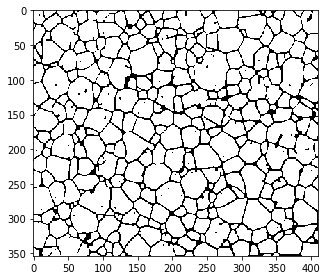

In [7]:
#covertimg thresholded image to binary
mask = dilated == 255 #Sets TRUE for all 255 valued pixels and FALSE for 0

io.imshow(mask)

**WE USED `io.imshow()` TO DISPLAY BINARY IMAGE RATHER THAN `cv2` as `cv2.imshow()` fails to display a binary type image.**

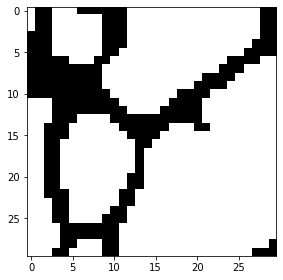

In [8]:
#zooming into the image to see pixelated image and a clear picture of grain boundary 
io.imshow(mask[250:280,250:280])

### Step 4 : Labelling

Now we have well separated grains and background. Each grain is like an object. **label** is a unique ID number assigned to each object.

`scipy.ndimage` has a function called `label` which labels the unconnected grains. Which means even if the grains are connected with a single pixel that it is cosidered as single object altogether.


The '**structure**' parameter defines the connectivity for the labeling. This specifies when to consider a pixel to be connected to another nearby pixel, i.e. to be part of the same object.

A **4** connectivity would be [[0,1,0],[1,1,1],[0,1,0]] if not defined explicitely in `ndimage.label()`

Connectivity what that basically means is the diagonal the diagonal pixels will be included as part of the structure.

*There is also 8 connectivity.*

In [14]:
#labelling the grains in the mask image

s = [[1,1,1],[1,1,1],[1,1,1]] #structure factor

#label_im, nb_labels = ndimage.label(mask)
labeled_mask, num_labels = ndimage.label(mask, structure=s)

`ndimage.label()` function outputs a new image that contains a different integer label for each object, and also the number of objects found.

In [17]:
print(num_labels)  #the number of grains in the image

296


In [19]:
#Let's color the labels to see the effect
img2 = color.label2rgb(labeled_mask, bg_label=0)

`color.label2rgb()` assigns random colors in red, green and blue and it to the labels.


`bg_label` assigns color to the background.

In [20]:
cv2.imshow('Colored Grains', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

View just by making `mask=threshold` and also `mask = dilation` (after morph operations). Some grains are well separated after morph operations.

#Now each object had a unique number in the image. 
#Total number of labels found are...
#print(num_labels) 

### Step 5: Measure the properties of each grain (object)

`regionprops()` function in `skimage.measure` module calculates useful parameters for each object.

**NOTE:** send in original image in `regionprops()` for Intensity measurements

In [22]:
clusters = measure.regionprops(labeled_mask, img)  #send in original image for Intensity measurements

The output of the function is a list of object properties. Lest test a few measurements.

In [23]:
print(clusters[0].perimeter)

118.18376618407356


We can also print various parameters for all objects i.e., all labeled regions

In [24]:
for prop in clusters:
   print('Label: {} Area: {}'.format(prop.label, prop.area))

Label: 1 Area: 415
Label: 2 Area: 187
Label: 3 Area: 221
Label: 4 Area: 12
Label: 5 Area: 524
Label: 6 Area: 327
Label: 7 Area: 48
Label: 8 Area: 212
Label: 9 Area: 198
Label: 10 Area: 1228
Label: 11 Area: 1479
Label: 12 Area: 221
Label: 13 Area: 15
Label: 14 Area: 84
Label: 15 Area: 153
Label: 16 Area: 1423
Label: 17 Area: 69
Label: 18 Area: 296
Label: 19 Area: 172
Label: 20 Area: 358
Label: 21 Area: 293
Label: 22 Area: 1304
Label: 23 Area: 321
Label: 24 Area: 123
Label: 25 Area: 418
Label: 26 Area: 847
Label: 27 Area: 589
Label: 28 Area: 18
Label: 29 Area: 999
Label: 30 Area: 345
Label: 31 Area: 159
Label: 32 Area: 1837
Label: 33 Area: 22
Label: 34 Area: 713
Label: 35 Area: 62
Label: 36 Area: 42
Label: 37 Area: 35
Label: 38 Area: 191
Label: 39 Area: 845
Label: 40 Area: 1114
Label: 41 Area: 120
Label: 42 Area: 278
Label: 43 Area: 453
Label: 44 Area: 40
Label: 45 Area: 354
Label: 46 Area: 216
Label: 47 Area: 622
Label: 48 Area: 48
Label: 49 Area: 152
Label: 50 Area: 212
Label: 51 Area:

### Step 6: Output results into a csv file   

In [25]:
#Best way is to output all properties to a csv file
    
propList = ['Area',
            'equivalent_diameter', #Added... verify if it works
            'orientation', #Added, verify if it works. Angle btwn x-axis and major axis.
            'MajorAxisLength',
            'MinorAxisLength',
            'Perimeter',
            'MinIntensity',
            'MeanIntensity',
            'MaxIntensity']    
    

output_file = open('image_measurements.csv', 'w')
output_file.write(',' + ",".join(propList) + '\n') #join strings in array by commas, leave first cell blank
#First cell blank to leave room for header (column names)

for cluster_props in clusters:
    #output cluster properties to the excel file
    output_file.write(str(cluster_props['Label']))
    for i,prop in enumerate(propList):
        if(prop == 'Area'): 
            to_print = cluster_props[prop]*pixels_to_um**2   #Convert pixel square to um square
        elif(prop == 'orientation'): 
            to_print = cluster_props[prop]*57.2958  #Convert to degrees from radians
        elif(prop.find('Intensity') < 0):          # Any prop without Intensity in its name
            to_print = cluster_props[prop]*pixels_to_um
        else: 
            to_print = cluster_props[prop]     #Reamining props, basically the ones with Intensity in its name
        output_file.write(',' + str(to_print))
    output_file.write('\n')
output_file.close()   #Closes the file, otherwise it would be read only. 